In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
%load_ext autoreload
%autoreload 2
import edunn as nn
import numpy as np

# Clasificación con CNN

También podemos entrenar una red neuronal para clasificar las imágenes de dígitos escritos a mano del conjunto de datos de [MNIST](http://yann.lecun.com/exdb/mnist/). Este conjunto de datos es un clásico en el aprendizaje automático, y es un buen punto de partida para probar las redes neuronales convolucionales. Intentá probar agregando/quitando capas adicionales y variando los parámetros de las mismas.


In [3]:
x,y,classes=nn.datasets.load_classification("mnist")
# normalización de los datos
# x = (x-x.mean(axis=0))/x.std(axis=0)
n, din = x.shape
# calcular cantidad de clases
classes = y.max()+1
print("Tamaños de x e y:", x.shape,y.shape)

Tamaños de x e y: (1200, 784) (1200,)


In [4]:
i=4

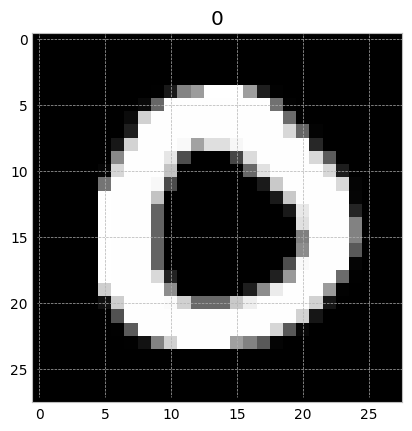

In [5]:
import matplotlib.pyplot as plt
plt.title(y[i])
plt.imshow(np.reshape(x[i],(28,28)),cmap="gray")

In [6]:
x = x.reshape(-1, 1, 28, 28)

In [7]:
# Min-Max Normalization
# x -= x.min()
# x /= x.max()

In [8]:
x.min(), x.max()

(0.0, 255.0)

In [9]:
# Negative Image
# x *= -1
# x +=  1

In [10]:
# def downsample_images(x):
#     N, C, H, W = x.shape

#     # Reshape the image to group every 2x2 pixels
#     x = x.reshape(N, C, H//2, 2, W//2, 2)

#     # Calculate the mean in the new dimensions to reduce the size of the image
#     x_downsampled = x.mean(axis=(3, 5))

#     return x_downsampled

# x = downsample_images(x)
# x.shape

In [11]:
# import matplotlib.pyplot as plt
# plt.title(y[i])
# plt.imshow(np.reshape(x[i,0],(14,14)),cmap="gray")

In [12]:
def calculate_in_features(input_size, layers):
    output_size = input_size
    for layer in layers:
        output_size = (output_size - layer['kernel_size'] + 2*layer['padding']) // layer['stride'] + 1
        out_channels = layer['out_channels']
    in_features = output_size * output_size * out_channels
    return in_features

layers = [
    {'out_channels': 32,    'kernel_size': 3,   'stride': 1, 'padding': 0},
    {'out_channels': 32,    'kernel_size': 2,   'stride': 2, 'padding': 0},
    {'out_channels': 64,    'kernel_size': 3,   'stride': 1, 'padding': 0},
    {'out_channels': 64,    'kernel_size': 2,   'stride': 2, 'padding': 0},
]
input_size = x.shape[-1]
in_features = calculate_in_features(input_size, layers)
in_features

1600

In [13]:
#Red con dos capas 
initializer = None#nn.initializers.RandomNormal(1e-20)
model = nn.Sequential([
    nn.Convolution2D(in_channels=1,     out_channels=32,    kernel_size=(3,3),      stride=1, padding=0, kernel_initializer=initializer),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Convolution2D(in_channels=32,    out_channels=64,    kernel_size=(3,3),      stride=1, padding=0, kernel_initializer=initializer),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Dense(input_size=in_features,output_size=128,activation_name="relu",linear_initializer=None),
    nn.Dense(input_size=128,output_size=classes,activation_name="softmax",linear_initializer=None),
    ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.GradientDescent(lr=0.1,epochs=100,batch_size=16)

In [14]:
np.set_printoptions(threshold=sys.maxsize)

In [15]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

optim. Sequential_0:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print("Métricas del modelo:")
y_pred=model.forward(x)

In [ ]:
y_pred_labels=nn.utils.onehot2labels(y_pred)

In [ ]:
nn.metrics.classification_summary(y,y_pred_labels.astype(int))